# B21-CAP0139
Resource: https://github.com/ggeop/Job-Recommendation-Engine

## Install and Import Libraries

In [1]:
# Install PyPDF2
!pip install PyPDF2

     |████████████████████████████████| 81kB 9.3MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp37-none-any.whl size=61085 sha256=196c386be5b4ec9894b922fdb0094b0abda6616e77559b031e4e3d320ae51ca6
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [2]:
# Import library
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras import metrics
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.layers import Flatten
from tensorflow.keras import regularizers

from nltk import word_tokenize, pos_tag, chunk
from pprint import pprint
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from pprint import pprint
import pandas as pd
import numpy as np

from keras import optimizers
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.constraints import maxnorm
from keras.preprocessing import sequence
from keras.layers import Dropout
import os

import matplotlib.pyplot as plt
import PyPDF2

In [3]:
tf.__version__

'2.5.0'

In [3]:
# Mount to drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Specify path to dataset
path = '/content/gdrive/MyDrive/Capstone/Shared/ML'
filename = 'Cleaned_Job_All.csv'
data = pd.read_csv(os.path.join(path, filename), header = 0, names = ['Query', 'Description'])

## Load and Split Dataset

In [9]:
# Check loaded data
data.head()

,Query,Description
0.0,Data Scientist,job description junior data scientist ibm work...
1.0,Data Scientist,overall summary data scientist data science so...
2.0,Data Scientist,team data science team newly formed applied re...
3.0,Data Scientist,need junior data scientist ny area remote succ...
4.0,Data Scientist,want help guide core business spotify using in...


In [6]:
# Check amount of data
len(data)

19900

In [7]:
# Check available job titles
data['Query'].unique()

array(['Data Scientist', 'Data Analyst', 'Data Architect',
       'Data Engineer', 'Statistician', 'Database Administrator',
       'Business Analyst', 'Data and Analytics Manager',
       'Machine Learning Engineer', 'Artificial Intelligence Expert',
       'Deep Learning Expert', 'Business Intelligence Analyst',
       'Data Visualization Expert', 'Data Quality Manager',
       'Big Data Engineer', 'Data Warehousing Analyst',
       'Technology Integration Analyst', 'IT Consultant',
       'IT Systems Administrator', 'Cloud Architect',
       'Technical Operations Engineer', 'Cloud Services Developer',
       'Full Stack Developer', 'Information Security Analyst',
       'Network Architect', 'Architect', 'Chemical Engineer',
       'Mechanical Engineer', 'Electrical Engineer', 'Civil Engineer',
       'Teacher', 'Professor', 'Lawyer', 'Psychologist', 'Recruiter',
       'Accountant', 'Financial Analyst', 'Investment Manager',
       'Management Consultant', 'Auditor', 'Dentist',
    

In [10]:
# Split data for training and testing
train, test = train_test_split(data, test_size = 0.2, random_state = 42, shuffle = True)

train_descs = train['Description']
train_labels = train['Query']
 
test_descs = test['Description']
test_labels = test['Query']

## Train the model

In [16]:
# Define parameters
vocab_size = 3000
sequences_length = 1200

embedding_dim = 128
max_features = 2500

num_labels = len(train_labels.unique())
batch_size = 32
nb_epoch = 10

filter = 200
kernel_size = 16
hidden_dims = 512

In [17]:
# Convert texts to numeric vectors using tokenizer
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_descs)

x_train = tokenizer.texts_to_sequences(train_descs)
x_test = tokenizer.texts_to_sequences(test_descs)

x_train = sequence.pad_sequences(x_train, maxlen=sequences_length, padding='post')
x_test = sequence.pad_sequences(x_test, maxlen=sequences_length, padding='post')

encoder = LabelBinarizer()
encoder.fit(train_labels)
y_train = encoder.transform(train_labels)
y_test = encoder.transform(test_labels)

In [ ]:
encoder.classes_

array(['Accountant', 'Architect', 'Artificial Intelligence Expert',
       'Auditor', 'Big Data Engineer', 'Business Analyst',
       'Business Intelligence Analyst', 'Chemical Engineer',
       'Civil Engineer', 'Cloud Architect', 'Cloud Services Developer',
       'Data Analyst', 'Data Architect', 'Data Engineer',
       'Data Quality Manager', 'Data Scientist',
       'Data Visualization Expert', 'Data Warehousing Analyst',
       'Data and Analytics Manager', 'Database Administrator',
       'Deep Learning Expert', 'Dentist', 'Electrical Engineer',
       'Financial Analyst', 'Full Stack Developer', 'IT Consultant',
       'IT Systems Administrator', 'Information Security Analyst',
       'Investment Manager', 'Lawyer', 'Machine Learning Engineer',
       'Management Consultant', 'Mechanical Engineer',
       'Mobile Applications Developer', 'Network Architect',
       'Nurse Practitioner', 'Pharmacist', 'Physician', 'Professor',
       'Psychologist', 'Recruiter', 'Social Media Ma

In [ ]:
# Define and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=sequences_length),
    tf.keras.layers.Conv1D(filter, kernel_size, padding='valid', activation='relu', strides=1),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(hidden_dims, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(num_labels, activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics = ['accuracy'])

In [ ]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1200, 128)         384000    
_________________________________________________________________
conv1d (Conv1D)              (None, 1185, 200)         409800    
_________________________________________________________________
global_max_pooling1d (Global (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               102912    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 47)                24111     
Total params: 920,823
Trainable params: 920,823
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=True,
                    validation_split=0.2)

Epoch 1/10
398/398 [==============================] - 46s 42ms/step - loss: 3.1499 - accuracy: 0.1694 - val_loss: 1.8800 - val_accuracy: 0.4472
Epoch 2/10
398/398 [==============================] - 16s 41ms/step - loss: 1.4370 - accuracy: 0.5686 - val_loss: 1.0692 - val_accuracy: 0.6862
Epoch 3/10
398/398 [==============================] - 16s 41ms/step - loss: 0.7932 - accuracy: 0.7615 - val_loss: 0.9336 - val_accuracy: 0.7249
Epoch 4/10
398/398 [==============================] - 16s 41ms/step - loss: 0.4694 - accuracy: 0.8596 - val_loss: 0.9307 - val_accuracy: 0.7406
Epoch 5/10
398/398 [==============================] - 16s 41ms/step - loss: 0.2810 - accuracy: 0.9270 - val_loss: 1.0021 - val_accuracy: 0.7299
Epoch 6/10
398/398 [==============================] - 16s 40ms/step - loss: 0.1938 - accuracy: 0.9548 - val_loss: 1.0473 - val_accuracy: 0.7453
Epoch 7/10
398/398 [==============================] - 16s 40ms/step - loss: 0.1584 - accuracy: 0.9687 - val_loss: 1.0345 - val_accuracy:

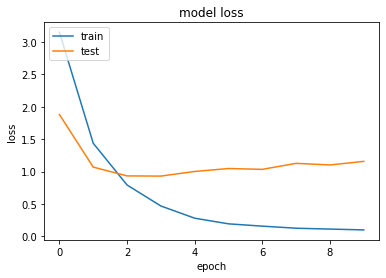

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Save Model

In [ ]:
tf.saved_model.save(model,'/content/gdrive/My Drive/saved_model')


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/saved_model/assets


## Load CV and Predict

In [11]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Capstone/Shared/ML/saved_model')

In [12]:
pdf_file = '/content/gdrive/My Drive/Capstone/Shared/ML/Curriculum Vitae.pdf'

pdf_read = PyPDF2.PdfFileReader(pdf_file)
page = pdf_read.getPage(0)
page_content = page.extractText()

print(page_content)

 
rm
 
Rafif
 
Rahman
 
Darmawan
 
Electrical Engineer
 
 
 
Experience
 
Orga
nization
 
Achievements
 
Education
 
Final year undergraduate student at Institut Teknologi Bandung majoring in Electrical 
Engineerin
g
 
with a GPA of 3.57
.
 
Have huge interests in the development of technology and it's 
application. Experienced working on field as a Field Engineer in a multinational company as well 
as working as an IoT Engineer in an emerging start
-
up. Possess wide range of skills in 
Programmin
g 
using 
Python, C, and Java, hardware design/interfacing 
using 
Arduino and 
Raspberry Pi and engineering simulation software 
using
 
MATLAB, LTSpice and Webots. Looking 
forward to work as an engineer in related fields in a growth
-
oriented company.
 
Personal Info
 
 
 
Languages
 
 
 
Jun 2019
 

 
Aug 2019
 
Sep 2019
 

 
 
Present
 
 
 
 
 
Sep 2019
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Jul 2019
 
 
 
 
 
Jun 2017
 
 
 
2013
 
-
 
2014
 
 
2014
 
-
 
 
2017
 
 
2017
 

 
 
Present
 
 
 
Ad

In [19]:
token_list = tokenizer.texts_to_sequences([page_content])[0]
token_list = pad_sequences([token_list], maxlen=1200, padding='post')
predicted = model.predict(token_list, verbose=0)

print(np.argmax(predicted))

2


In [ ]:
list(encoder.classes_)

['Accountant',
 'Architect',
 'Artificial Intelligence Expert',
 'Auditor',
 'Big Data Engineer',
 'Business Analyst',
 'Business Intelligence Analyst',
 'Chemical Engineer',
 'Civil Engineer',
 'Cloud Architect',
 'Cloud Services Developer',
 'Data Analyst',
 'Data Architect',
 'Data Engineer',
 'Data Quality Manager',
 'Data Scientist',
 'Data Visualization Expert',
 'Data Warehousing Analyst',
 'Data and Analytics Manager',
 'Database Administrator',
 'Deep Learning Expert',
 'Dentist',
 'Electrical Engineer',
 'Financial Analyst',
 'Full Stack Developer',
 'IT Consultant',
 'IT Systems Administrator',
 'Information Security Analyst',
 'Investment Manager',
 'Lawyer',
 'Machine Learning Engineer',
 'Management Consultant',
 'Mechanical Engineer',
 'Mobile Applications Developer',
 'Network Architect',
 'Nurse Practitioner',
 'Pharmacist',
 'Physician',
 'Professor',
 'Psychologist',
 'Recruiter',
 'Social Media Manager',
 'Statistician',
 'Surgeon',
 'Teacher',
 'Technical Operation